# 합성곱 신경망 (CNN)

In [1]:
# 간단한 컨브넷 만들기
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
# 모델 확인
model.summary()
# Param 수 구하는 공식
# (입력채널수 * 필터크기 * 필터수) + 필터수

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [15]:
# mnist 데이터셋 로드
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.1579 - accuracy: 0.9502
Epoch 2/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0178 - accuracy: 0.9945


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도: {test_acc:.3f}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0231 - accuracy: 0.9920
테스트 정확도: 0.992


In [20]:
# MaxPooling 층이 빠진 구조
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(inputs)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 flatten_1 (Flatten)         (None, 86528)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                865290    
                                                                 
Total params: 866570 (3.31 MB)
Trainable params: 866570 (3.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# !kaggle competitions download -c dogs-vs-cats
# !unzip -qq dogs-vs-cats.zip
# !unzip -qq train.zip

In [53]:
# 이미지를 훈련, 검증, 테스트 디렉터리로 복사
import os, shutil, pathlib

original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f'{category}.{i}.jpg'
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst=dir / fname)

make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

In [57]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [58]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [59]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## image_dataset_from_directory
1. 사진 파일읽기
2. jpeg 콘텐츠를 rgb 픽셀 값으로 디코딩
3. 부동 소수점 타입의 텐서로 변환
4. 동일한 크기의 이미지로 변환
5. 배치로 묶는다
이 과정을 자동으로 처리하는 유틸리티함수

In [60]:
# image_dataset_from_directory 이미지 읽기
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [61]:
# 각 Datset의 데이터와 레이블 크기 확인
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break #1개만 확인

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


## ModelCheckpoint 콜백
epoch가 끝날때마다 모델을 저장, 매개변수로 save_best_only=True랑 monitor='val_loss'를 지정하면

각 epoch마다 val_loss 값이 이전보다 낮을 때만 모델을 저장한다. (과대적합이 시작되는 epoch으로 새로운 모델을 훈련할 필요가 없어짐 !! 매우 효율적)

In [64]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

63/63 [==============================] - 216s 3s/step - loss: 0.5551 - accuracy: 0.7355 - val_loss: 0.7658 - val_accuracy: 0.5810


In [ ]:
import matplotlib.pyplot as plt

# 정확도, 검증정확도
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 손실, 검증손실
loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch을 30으로 했으니 30만큼 범위지정 (1~30)

# 정확도 시각화
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label='Train accuracy') # 파란색 원형
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy') # 파란색 선
plt.title("Training and Validation accuracy")
plt.legend()
# 손실, 검증손실 시각화
plt.figure()
plt.plot(epochs, loss, 'bo', label='Train loss') # 파란색 원형
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 파란색 선
plt.title("Training and Validation loss")
plt.legend()
plt.show
# 훈련데이터가 2000개뿐이 안되서 그래프에서 보듯 epoch10개쯤 부터 과대적합이 일어난듯

In [68]:
# 테스트 정확도 확인
test_model = keras.models.load_model('convnet_from_scratch.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

63/63 [==============================] - 55s 852ms/step - loss: 0.7671 - accuracy: 0.5825
테스트 정확도: 0.582


## 데이터 증강(증식) = Data augment 을통해 과대적합 방지하기

In [71]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
) # 지금은 좌우반전, 회전, 확대 만 썻는데 더다양한것들이 많음
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip

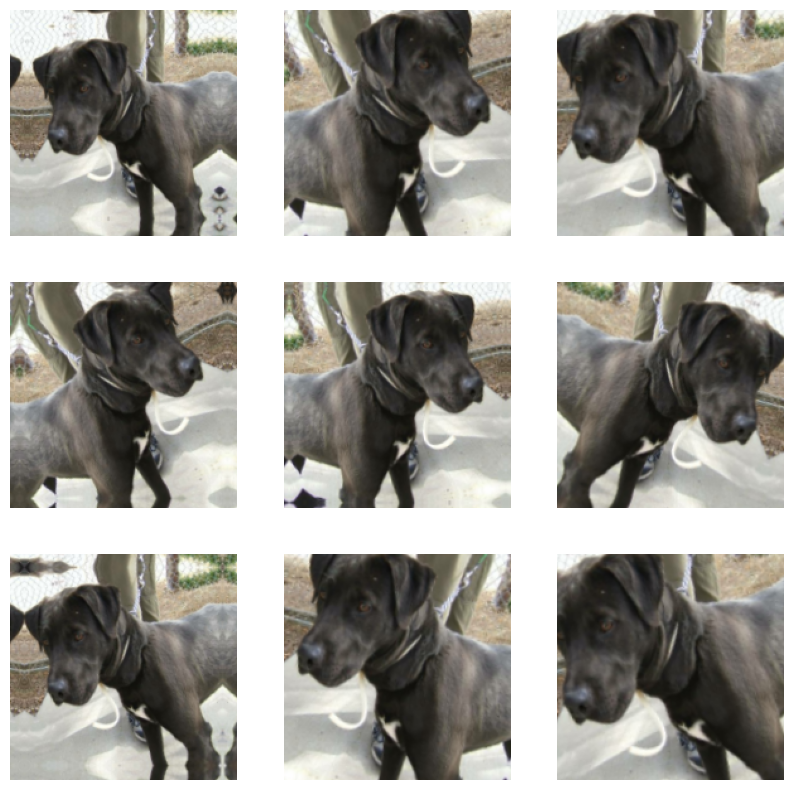

In [72]:
# 랜덤하게 증식(좌우반전, 회전, 확대) 한 이미지보기

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [73]:
# data augment 층을 추가한 모델
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [74]:
# data augment와 drop을 적용한 모델로 학습해보기
"""
100번은 너무 오래걸려서 이미 돌린파일(.h5)파일로 대체
"""

# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch_with_augmentation.h5",
#         save_best_only=True,
#         monitor="val_loss")
# ]
# history = model.fit(
#     train_dataset,
#     epochs=100, # data augment와 dropout을 적용했기 때문에 과대적합이 더 늦게 일어날것이기에 epoch 100으로
#     validation_data=validation_dataset,
#     callbacks=callbacks)

'\n100번은 너무 오래걸려서 이미 돌린파일(.h5)파일로 대체\n'

In [82]:
# 저자 github의 학습되어있는 .h5파일 다운
!wget https://github.com/rickiepark/deep-learning-with-python-2nd/raw/main/convnet_from_scratch_with_augmentation.h5

--2024-06-02 15:07:38--  https://github.com/rickiepark/deep-learning-with-python-2nd/raw/main/convnet_from_scratch_with_augmentation.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/deep-learning-with-python-2nd/main/convnet_from_scratch_with_augmentation.h5 [following]
--2024-06-02 15:07:38--  https://raw.githubusercontent.com/rickiepark/deep-learning-with-python-2nd/main/convnet_from_scratch_with_augmentation.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7982856 (7.6M) [application/octet-stream]
Saving to: ‘convnet_from_scratch_with_augmentation.h5’

convnet_from_scratc 100%[

In [83]:
# 테스트 데이터셋으로 평가
test_model = keras.models.load_model(
    'convnet_from_scratch_with_augmentation.h5'
)

test_logss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

63/63 [==============================] - 62s 988ms/step - loss: 0.3975 - accuracy: 0.8650
테스트 정확도: 0.865


## 사전 훈련된 (VGG)로 특성 추출

In [84]:
# VGG16 모델
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [85]:
# VGG16 모델 구조 보기
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

## data augment를 하지않고 특성 추출해보기

In [86]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 5s 5s/step


In [87]:
train_features.shape

(2000, 5, 5, 512)

In [88]:
# 뽑아낸 특성으로 훈련
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=2, # 오래걸려서 2번만
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/2
63/63 [==============================] - 5s 65ms/step - loss: 15.8980 - accuracy: 0.9290 - val_loss: 3.0189 - val_accuracy: 0.9760
Epoch 2/2
 2/63 [..............................] - ETA: 3s - loss: 2.2486 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 4s 62ms/step - loss: 3.1808 - accuracy: 0.9745 - val_loss: 3.8575 - val_accuracy: 0.9690


In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [90]:
test_model = keras.models.load_model(
    "feature_extraction.h5")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 9ms/step - loss: 4.2128 - accuracy: 0.9710
테스트 정확도: 0.971
